In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [62]:
# dataset_url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# dataset_path = tf.keras.utils.get_file('food-101.tar.gz', origin=dataset_url, extract=True, cache_dir='.')
dataset_dir = os.path.join(os.path.dirname(dataset_path), 'food-101')

## Load metadata

In [63]:
meta_dir = os.path.join(dataset_dir, 'meta')
train_file = os.path.join(meta_dir, 'train.txt')
test_file = os.path.join(meta_dir, 'test.txt')
classes_file = os.path.join(meta_dir, 'classes.txt')

Read classes (labels)

In [38]:
classes = [d for d in os.listdir(dataset_dir + '/images') if os.path.isdir(os.path.join(dataset_dir + '/images', d))]

Display the number of classes

In [39]:
print(f'Total number of classes: {len(classes)}')

Total number of classes: 101


## Load train and test file lists

In [40]:
def load_file_list(file_path):
    with open(file_path, 'r') as f:
        file_list = f.read().splitlines()
    return file_list

In [44]:
train_list = load_file_list(train_file)
test_list = load_file_list(test_file)

## Number of training and testing images

In [45]:
print(f'Number of training images: {len(train_list)}')
print(f'Number of testing images: {len(test_list)}')

Number of training images: 75750
Number of testing images: 25250


In [46]:
train_classes = [path.split('/')[0] for path in train_list]
train_df = pd.DataFrame(train_classes, columns=['class'])

## Class distribution in the training set

In [47]:
train_class_distribution = train_df['class'].value_counts().sort_index()
print(train_class_distribution)

class
apple_pie         750
baby_back_ribs    750
baklava           750
beef_carpaccio    750
beef_tartare      750
                 ... 
tacos             750
takoyaki          750
tiramisu          750
tuna_tartare      750
waffles           750
Name: count, Length: 101, dtype: int64


## Class distribution

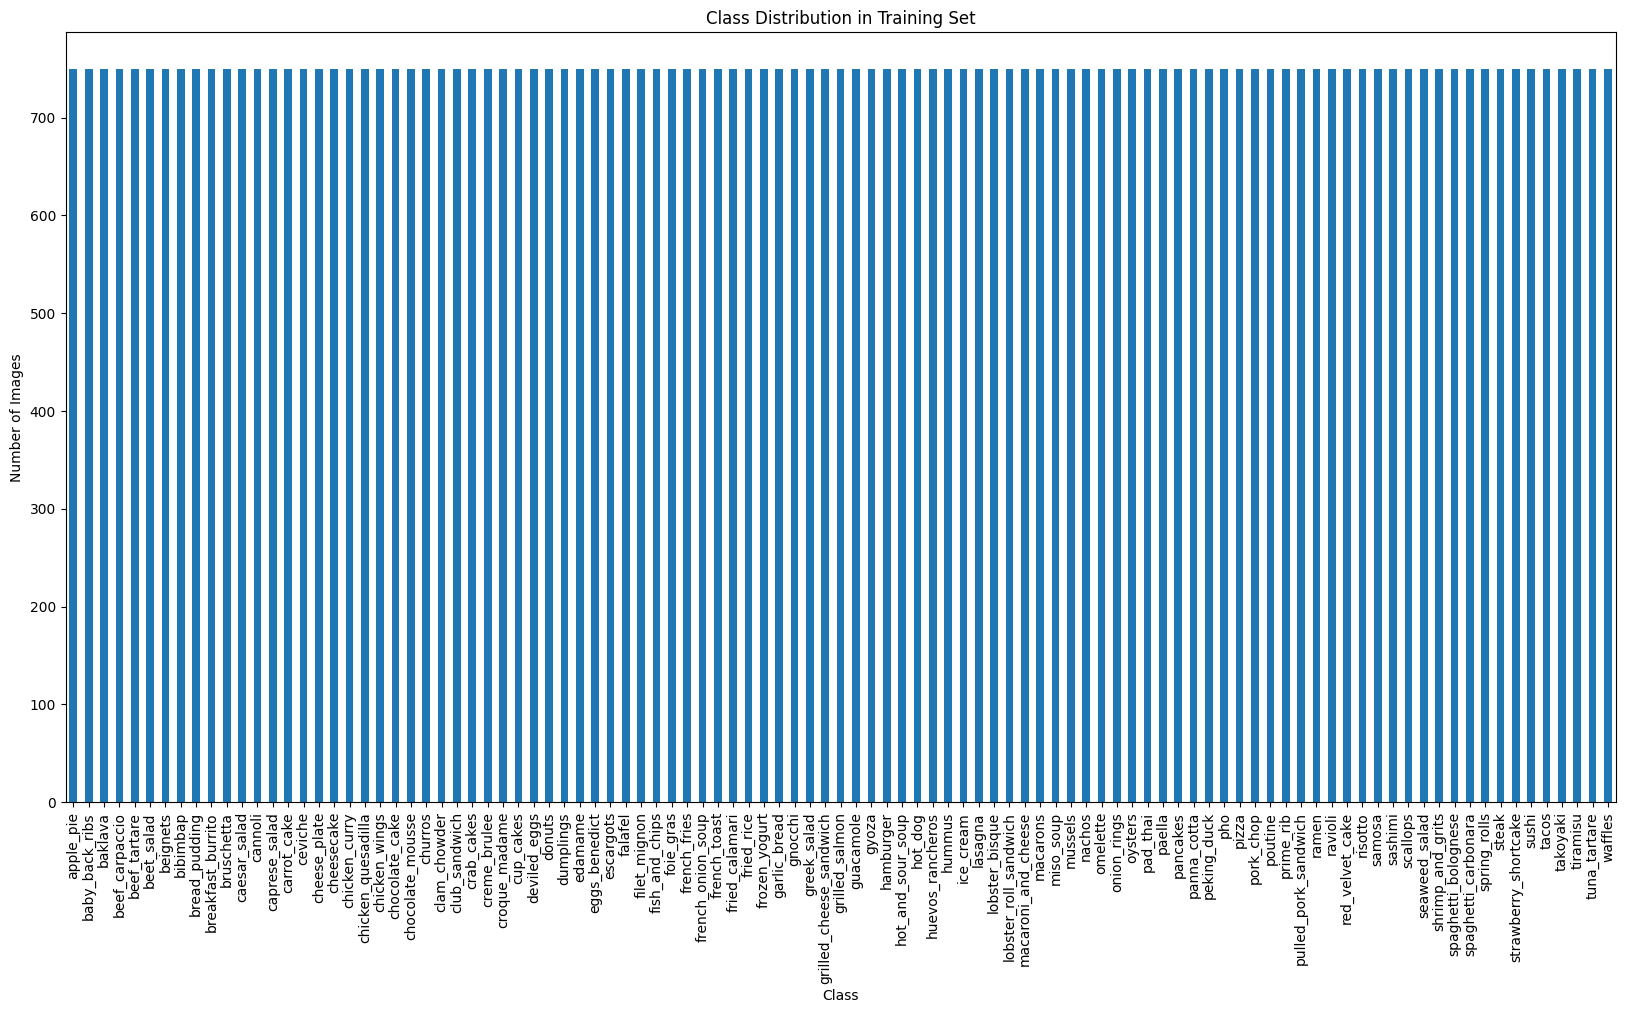

In [64]:
plt.figure(figsize=(20, 10))
train_class_distribution.plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## Display sample images

In [65]:
def display_sample_images(class_names, dataset_dir, num_samples=5):
    plt.figure(figsize=(15, 15))
    for i, class_name in enumerate(class_names[:num_samples]):
        class_dir = os.path.join(dataset_dir, 'images', class_name)
        sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
        sample_image = load_img(sample_image_path, target_size=(128, 128))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_image)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

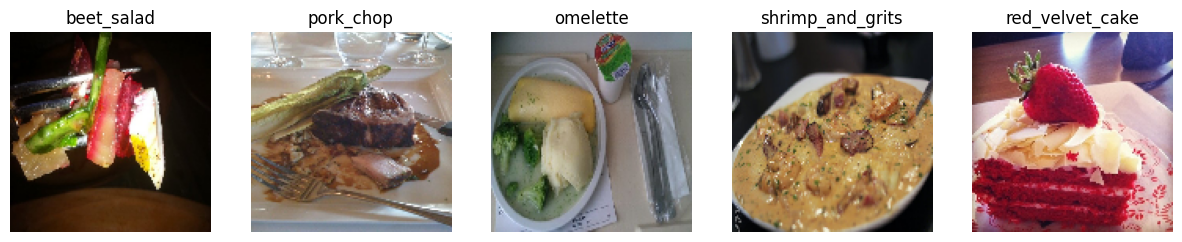

In [66]:
display_sample_images(classes, dataset_dir)

Check image dimensions to ensure consistency

In [67]:
def check_image_dimensions(file_list, dataset_dir, n=100):
    dimensions = []
    for file in file_list[:n]:
        img_path = os.path.join(dataset_dir, 'images', f'{file}.jpg')
        img = load_img(img_path)
        dimensions.append(img.size)
    return dimensions

Image dimension analysis

In [70]:
image_dimensions = check_image_dimensions(train_list, dataset_dir)
dimension_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])

dimension_df.head()

,Width,Height
0,308,512
1,512,512
2,512,512
3,512,512
4,512,512


## Image dimension stats

In [69]:
print(dimension_df.describe())

           Width      Height
count  100.00000  100.000000
mean   499.80000  477.820000
std     42.62261   60.034902
min    308.00000  340.000000
25%    512.00000  478.750000
50%    512.00000  512.000000
75%    512.00000  512.000000
max    512.00000  512.000000


## Distribution of image dimensions

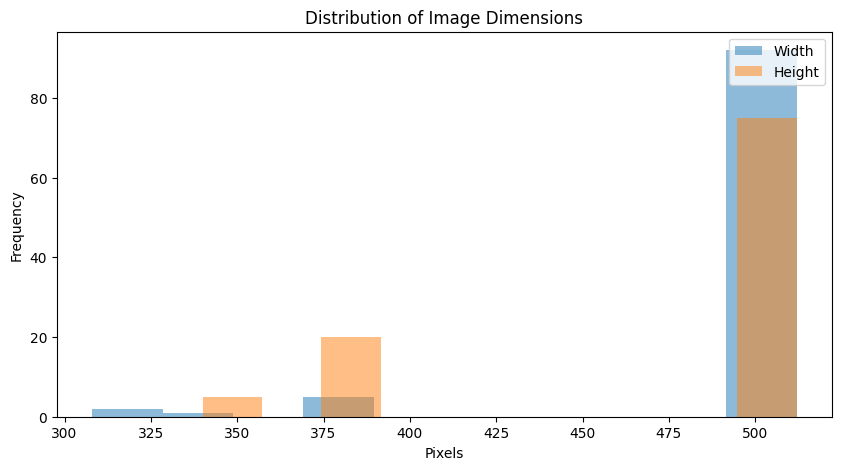

In [73]:
plt.figure(figsize=(10, 5))
plt.hist(dimension_df['Width'], bins=10, alpha=0.5, label='Width')
plt.hist(dimension_df['Height'], bins=10, alpha=0.5, label='Height')
plt.legend(loc='upper right')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.show()

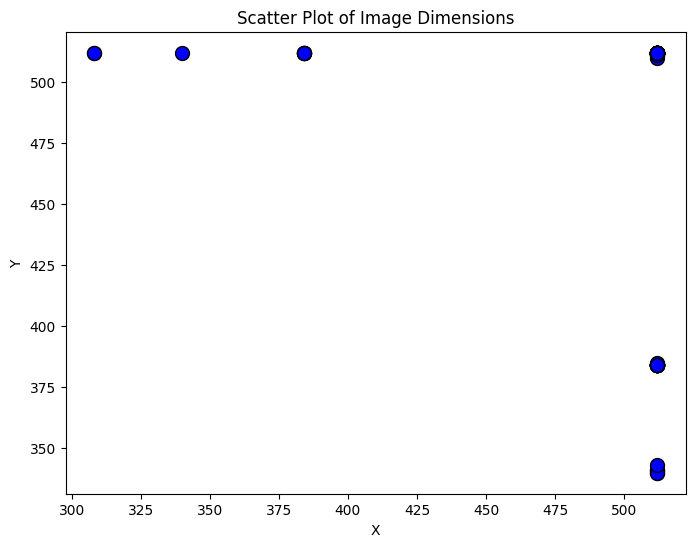

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(dimension_df['Width'], dimension_df['Height'], s=100, color='blue', edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

## Conclusion

The dataset is well-structured with consistent image dimensions. The class distribution is very well balanced. Sample images provide a visual confirmation of the dataset quality.